In [1]:
# === Part 1: Load dataset ===
import pandas as pd

df = pd.read_csv("BBox_List_2017.csv")
print("Shape:", df.shape)
print(df.head())



Shape: (984, 9)
        Image Index Finding Label     Bbox [x           y           w  \
0  00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   
1  00014716_007.png   Atelectasis  686.101695  131.543498  185.491525   
2  00029817_009.png   Atelectasis  221.830508  317.053115  155.118644   
3  00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   
4  00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   

           h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0   79.186441         NaN         NaN         NaN  
1  313.491525         NaN         NaN         NaN  
2  216.949153         NaN         NaN         NaN  
3   55.322034         NaN         NaN         NaN  
4   78.101695         NaN         NaN         NaN  


In [3]:
# === Part 2: Basic info ===
print(df.info())
print(df.describe())

print("Unique images:", df["Image Index"].nunique())
print("Unique diseases:", df["Finding Label"].nunique())
print(df["Finding Label"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Index    984 non-null    object 
 1   Finding Label  984 non-null    object 
 2   Bbox [x        984 non-null    float64
 3   y              984 non-null    float64
 4   w              984 non-null    float64
 5   h]             984 non-null    float64
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     0 non-null      float64
 8   Unnamed: 8     0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 69.3+ KB
None
          Bbox [x           y           w          h]  Unnamed: 6  Unnamed: 7  \
count  984.000000  984.000000  984.000000  984.000000         0.0         0.0   
mean   398.806111  405.425364  256.334708  252.302547         NaN         NaN   
std    222.700868  166.309995  167.629620  159.443635         NaN         NaN   
min      5.417989   12.837934 

In [5]:
# === Part 3: Add area column ===
df["area"] = df["w"] * df["h]"]
print(df[["w", "h]", "area"]].head())


            w          h]          area
0   86.779661   79.186441   6871.772479
1  185.491525  313.491525  58150.021258
2  155.118644  216.949153  33652.858374
3  141.016949   55.322034   7801.344441
4  200.677966   78.101695  15673.289285


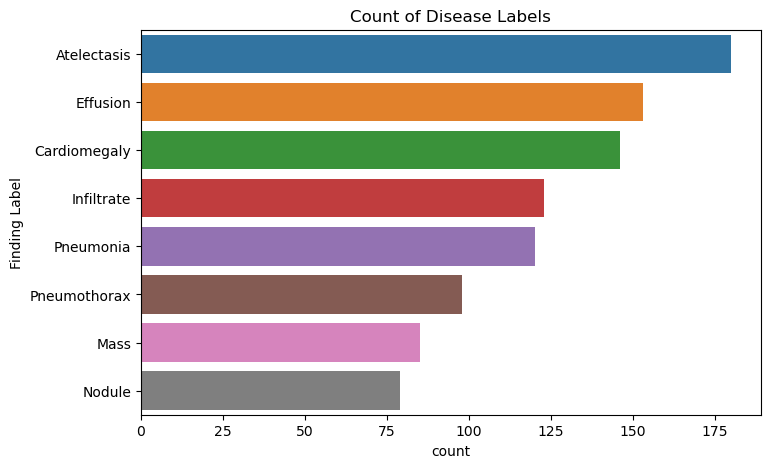

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


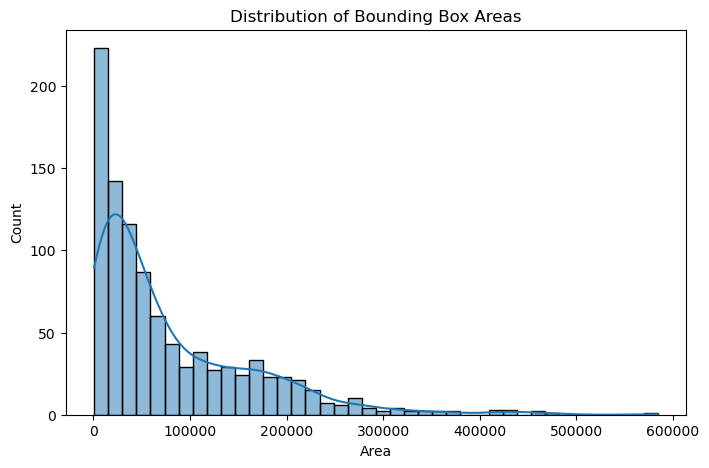

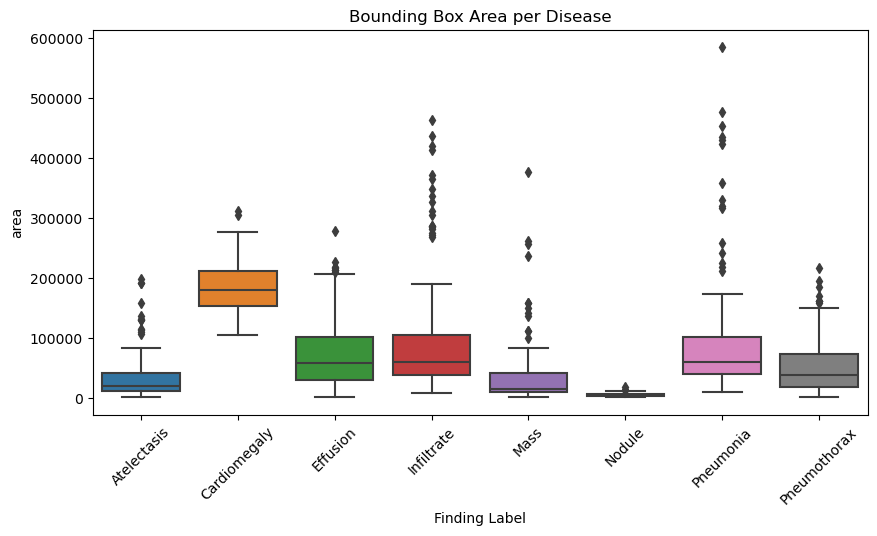

In [7]:
# === Part 4: Visualizations ===
import matplotlib.pyplot as plt
import seaborn as sns

# Count of disease labels
plt.figure(figsize=(8,5))
sns.countplot(y="Finding Label", data=df,
              order=df["Finding Label"].value_counts().index)
plt.title("Count of Disease Labels")
plt.show()

# Area distribution
plt.figure(figsize=(8,5))
sns.histplot(df["area"], bins=40, kde=True)
plt.title("Distribution of Bounding Box Areas")
plt.xlabel("Area")
plt.show()

# Boxplot by disease type
plt.figure(figsize=(10,5))
sns.boxplot(x="Finding Label", y="area", data=df)
plt.xticks(rotation=45)
plt.title("Bounding Box Area per Disease")
plt.show()


In [8]:
# === Part 5: Filtering examples ===
big_boxes = df[df["area"] > 50000]
print("Large boxes:", big_boxes.shape)

small_boxes = df[df["area"] < 5000]
print("Small boxes:", small_boxes.shape)

multi_labels = df.groupby("Image Index").size()
print("Images with multiple findings:", (multi_labels > 1).sum())


Large boxes: (473, 10)
Small boxes: (60, 10)
Images with multiple findings: 93


             w        h]      area
w     1.000000  0.540816  0.860499
h]    0.540816  1.000000  0.804454
area  0.860499  0.804454  1.000000


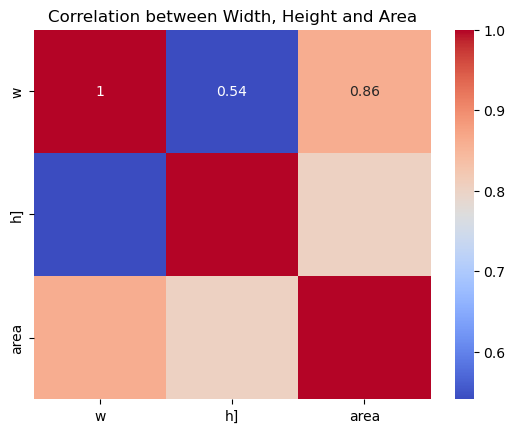

In [9]:
# === Part 6: Correlations ===
corr = df[["w", "h]", "area"]].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Width, Height and Area")
plt.show()


In [10]:
# === Part 7: Bounding box position analysis ===
import numpy as np

# Compute center points of bounding boxes
df["x_center"] = df["Bbox [x"] + df["w"]/2
df["y_center"] = df["y"] + df["h]"]/2

print(df[["Bbox [x", "y", "w", "h]", "x_center", "y_center"]].head())


      Bbox [x           y           w          h]    x_center    y_center
0  225.084746  547.019217   86.779661   79.186441  268.474576  586.612437
1  686.101695  131.543498  185.491525  313.491525  778.847458  288.289261
2  221.830508  317.053115  155.118644  216.949153  299.389831  425.527691
3  726.237288  494.951420  141.016949   55.322034  796.745763  522.612437
4  660.067797  569.780787  200.677966   78.101695  760.406780  608.831634


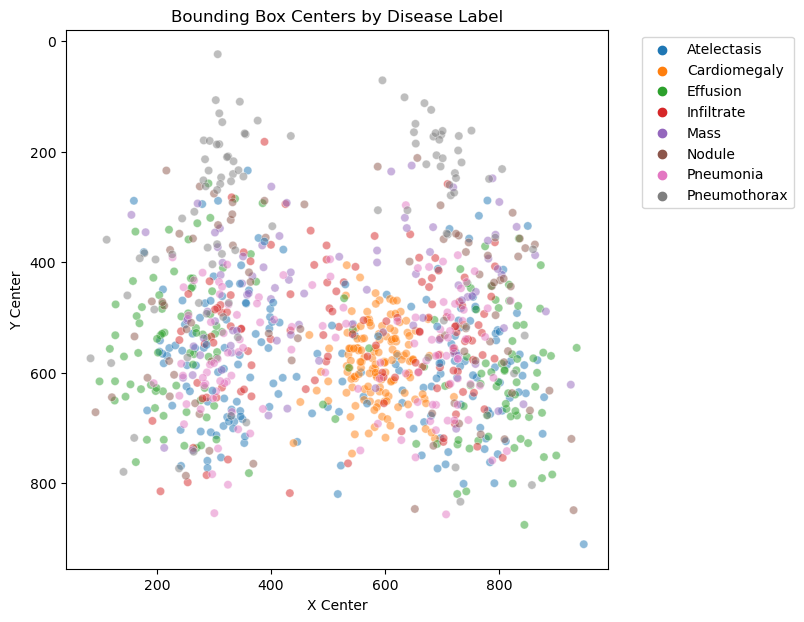

In [11]:
# Scatterplot of box centers

plt.figure(figsize=(7,7))
sns.scatterplot(
    x="x_center", 
    y="y_center", 
    data=df, 
    alpha=0.5, 
    hue="Finding Label", 
    legend="full"
)
plt.title("Bounding Box Centers by Disease Label")
plt.xlabel("X Center")
plt.ylabel("Y Center")
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # put legend outside plot
plt.show()


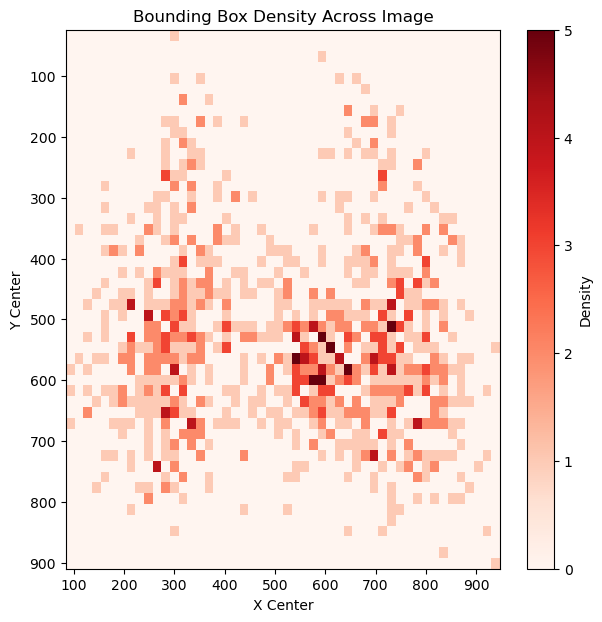

In [12]:
# Heatmap of bounding box density
plt.figure(figsize=(7,7))
plt.hist2d(df["x_center"], df["y_center"], bins=50, cmap="Reds")
plt.colorbar(label="Density")
plt.title("Bounding Box Density Across Image")
plt.xlabel("X Center")
plt.ylabel("Y Center")
plt.gca().invert_yaxis()
plt.show()


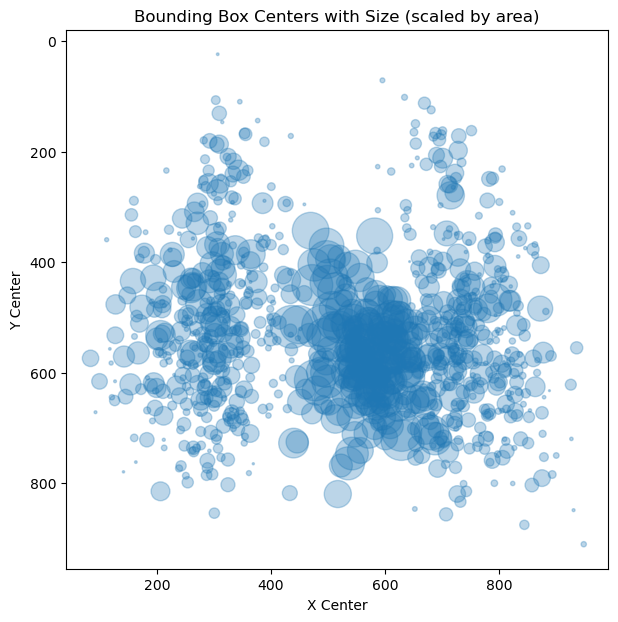

In [13]:
# Compare box size (area) vs position
plt.figure(figsize=(7,7))
plt.scatter(df["x_center"], df["y_center"], s=df["area"]/500, alpha=0.3)
plt.title("Bounding Box Centers with Size (scaled by area)")
plt.xlabel("X Center")
plt.ylabel("Y Center")
plt.gca().invert_yaxis()
plt.show()


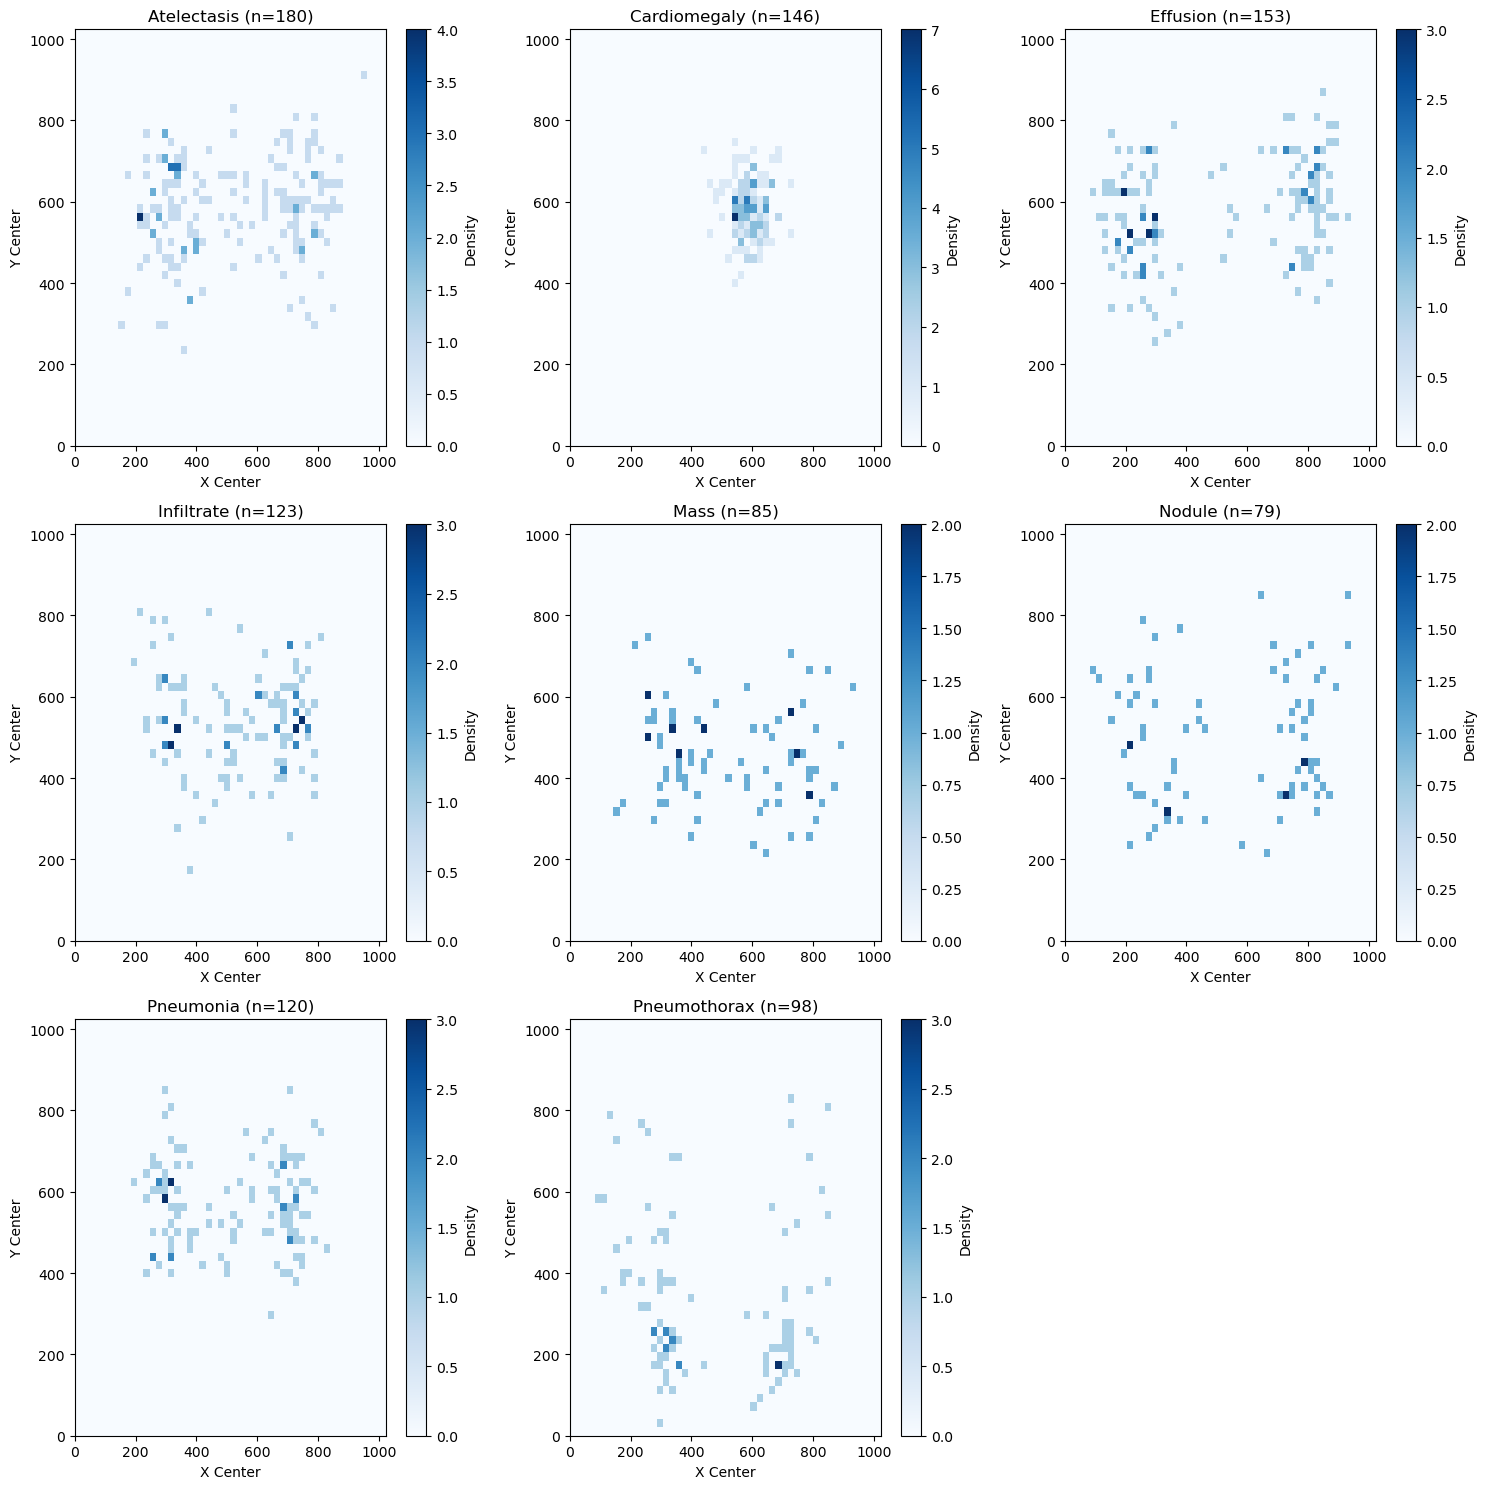

In [18]:
# === Part 8 (updated): Per-disease bounding box heatmaps with fixed scale ===
import math

unique_labels = df["Finding Label"].unique()
cols = 3
rows = math.ceil(len(unique_labels) / cols)

# Assuming image size ~1024x1024 (ChestX-ray14 standard)
img_w, img_h = 1024, 1024

plt.figure(figsize=(15, 5 * rows))

for i, label in enumerate(unique_labels, 1):
    subset = df[df["Finding Label"] == label]
    
    plt.subplot(rows, cols, i)
    plt.hist2d(
        subset["x_center"], subset["y_center"], 
        bins=[50, 50], range=[[0, img_w], [0, img_h]], cmap="Blues"
    )
    plt.gca().invert_yaxis()  # To align with image coordinate system
    plt.colorbar(label="Density")
    plt.title(f"{label} (n={len(subset)})")
    plt.xlabel("X Center")
    plt.ylabel("Y Center")
    plt.xlim(0, img_w)
    plt.ylim(0, img_h)

plt.tight_layout()
plt.show()


                        w          h]           area
Finding Label                                       
Cardiomegaly   479.834344  381.118611  184334.513890
Infiltrate     294.044417  297.393439  101381.534391
Pneumonia      276.470519  304.486942   98815.917503
Effusion       221.624451  318.007295   72002.740565
Pneumothorax   198.881123  246.010444   54644.573347
Mass           168.686870  189.838700   44378.918083
Atelectasis    218.960376  139.110324   33508.516887
Nodule          71.942670   70.433862    5468.771150


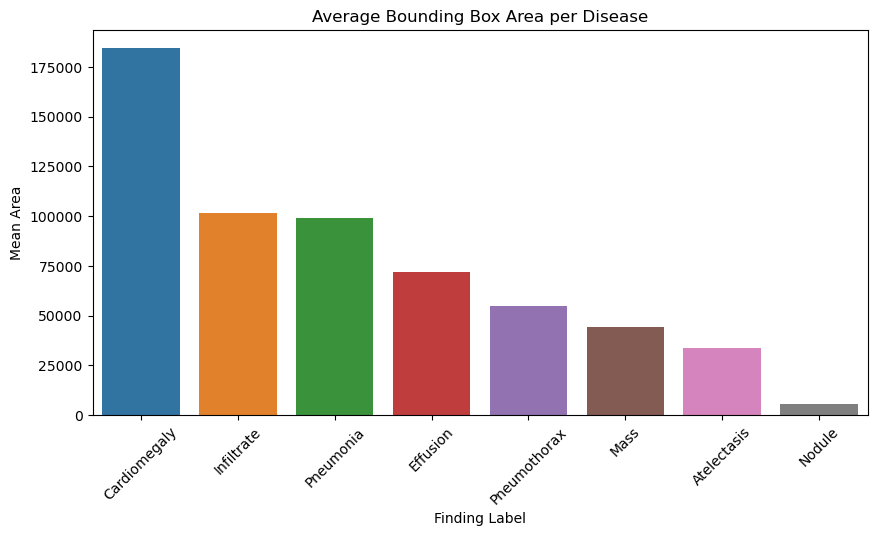

In [22]:
# === Part 9: Per-disease average bounding box size ===
avg_sizes = df.groupby("Finding Label")[["w", "h]", "area"]].mean().sort_values("area", ascending=False)
print(avg_sizes)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_sizes.index, y=avg_sizes["area"])
plt.xticks(rotation=45)
plt.title("Average Bounding Box Area per Disease")
plt.ylabel("Mean Area")
plt.show()
